In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xenaPython as xena

In [28]:
hub = "https://gdc.xenahubs.net"
# gene expression RNA sequence data 
dataset = "data/TCGA-LUAD.tsv"
df = pd.read_csv(dataset, sep='\t', header=0)
df.mean()

TCGA-97-7938-01A    3.182207
TCGA-55-7574-01A    3.116976
TCGA-05-4250-01A    3.358533
TCGA-55-6979-11A    2.789496
TCGA-95-A4VK-01A    3.428594
                      ...   
TCGA-97-7937-01A    3.389683
TCGA-05-4398-01A    3.983239
TCGA-50-6592-01A    3.385785
TCGA-44-3396-01A    3.850855
TCGA-91-6849-11A    3.054897
Length: 585, dtype: float64

In [29]:
df.fillna(df.mean())

,Ensembl_ID,TCGA-97-7938-01A,TCGA-55-7574-01A,TCGA-05-4250-01A,TCGA-55-6979-11A,TCGA-95-A4VK-01A,TCGA-97-A4M6-01A,TCGA-78-7155-01A,TCGA-05-4402-01A,TCGA-91-6831-11A,...,TCGA-86-7714-01A,TCGA-55-6970-11A,TCGA-44-6145-11A,TCGA-86-8076-01A,TCGA-50-5068-01A,TCGA-97-7937-01A,TCGA-05-4398-01A,TCGA-50-6592-01A,TCGA-44-3396-01A,TCGA-91-6849-11A
0,ENSG00000000003.13,10.989394,9.967226,12.386940,9.014020,11.148477,12.854479,11.935165,13.670324,8.451211,...,11.132500,9.632995,9.612868,11.681678,11.504322,12.095727,12.571516,11.709515,13.151017,10.359750
1,ENSG00000000005.5,4.000000,0.000000,2.584963,0.000000,1.000000,2.321928,3.169925,2.807355,0.000000,...,1.584963,0.000000,1.584963,0.000000,1.584963,0.000000,2.000000,1.000000,2.000000,1.000000
2,ENSG00000000419.11,10.253847,9.541097,11.501340,9.204571,9.679480,10.366322,10.221587,11.107217,9.569856,...,9.485829,9.616549,9.971544,10.594325,11.636171,11.658658,11.868437,11.298063,12.147523,9.645658
3,ENSG00000000457.12,9.776433,9.131857,9.521600,8.499846,10.529431,10.737247,8.951285,10.841564,8.262095,...,8.945444,8.797662,8.603626,10.464546,9.734710,10.703038,10.619303,9.612868,10.192293,8.900867
4,ENSG00000000460.15,7.971544,8.348728,9.618386,6.475733,8.357552,8.672425,9.832890,9.658211,5.491853,...,7.467606,6.375039,6.228819,8.483816,8.124121,9.505812,10.428360,9.455327,9.939579,6.303781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,__no_feature,21.883949,21.777064,21.136082,20.727173,22.363860,21.956358,20.927527,22.134473,20.649566,...,20.683845,21.303492,21.041609,21.863096,19.945668,22.599172,22.931126,21.748261,22.820419,21.143359
60484,__ambiguous,20.311930,20.327939,21.426467,19.879660,20.795977,20.952163,20.364467,22.109675,19.472810,...,19.582164,20.162541,20.445858,21.684915,20.546078,21.026197,22.278981,21.296537,22.390601,20.193134
60485,__too_low_aQual,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60486,__not_aligned,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
df['id2'] = df.index
df.set_index('Ensembl_ID',inplace=True)
df = df.T
df.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
TCGA-97-7938-01A,10.989394,4.000000,10.253847,9.776433,7.971544,8.724514,11.712957,10.404077,9.832890,11.601307,...,0.0,0.0,0.0,0.0,0.0,21.883949,20.311930,0.0,0.0,23.530974
TCGA-55-7574-01A,9.967226,0.000000,9.541097,9.131857,8.348728,9.703904,11.850968,10.648358,9.941048,9.924813,...,0.0,0.0,0.0,0.0,0.0,21.777064,20.327939,0.0,0.0,23.588639
TCGA-05-4250-01A,12.386940,2.584963,11.501340,9.521600,9.618386,10.536247,12.149112,12.364955,11.474720,11.852530,...,0.0,0.0,0.0,0.0,0.0,21.136082,21.426467,0.0,0.0,24.162948
TCGA-55-6979-11A,9.014020,0.000000,9.204571,8.499846,6.475733,11.596190,10.693487,10.638436,9.702173,9.571753,...,0.0,0.0,0.0,0.0,0.0,20.727173,19.879660,0.0,0.0,22.713226
TCGA-95-A4VK-01A,11.148477,1.000000,9.679480,10.529431,8.357552,9.238405,10.134426,11.471675,10.840778,10.812979,...,0.0,0.0,0.0,0.0,0.0,22.363860,20.795977,0.0,0.0,23.861771


In [32]:
df.shape

(586, 60488)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

# standardising the dataset
# standardDF = StandardScaler().fit_transform(df.iloc[1:586, 1:60488])
# pca = PCA(n_components=2)
# pca.fit(standardDF)
# dfPCA = pca.transform(standardDF)
# print(standardDF.shape)
# print(dfPCA.shape)


RangeIndex(start=1, stop=60488, step=1)


In [45]:
df = df.iloc[1:586, :]

dataScaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 
pca = PCA(n_components=2)
pca.fit(dataScaled)
dfPCA = pca.transform(dataScaled)

extended = pd.DataFrame(pca.components_,columns=dataScaled.columns,index = ['PC-1','PC-2'])
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(extended)
# extended.nlargest(5, extended.columns)

In [46]:
extended = extended.T
print(extended.nlargest(5, ['PC-1']))
print(extended.nlargest(5, ['PC-2']))

                        PC-1      PC-2
Ensembl_ID                            
ENSG00000168066.19  0.004068  0.000059
ENSG00000160199.13  0.004068  0.000058
ENSG00000182944.16  0.004068  0.000127
ENSG00000182149.19  0.004068  0.000134
ENSG00000182473.19  0.004068  0.000105
                        PC-1      PC-2
Ensembl_ID                            
ENSG00000066405.11  0.004049  0.001049
ENSG00000080618.12  0.004063  0.000955
ENSG00000096088.15  0.004063  0.000617
ENSG00000108576.8   0.004067  0.000602
ENSG00000088926.12  0.004065  0.000568


Text(0, 0.5, 'Second Principal Component')

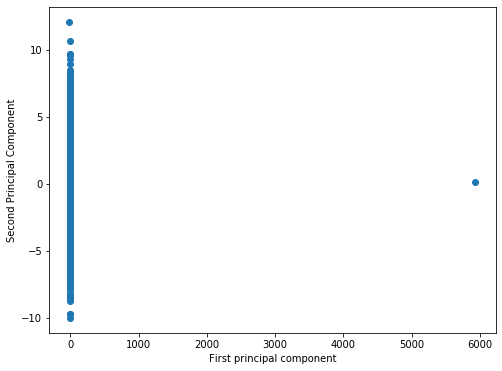

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(dfPCA[:,0], dfPCA[:,1],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

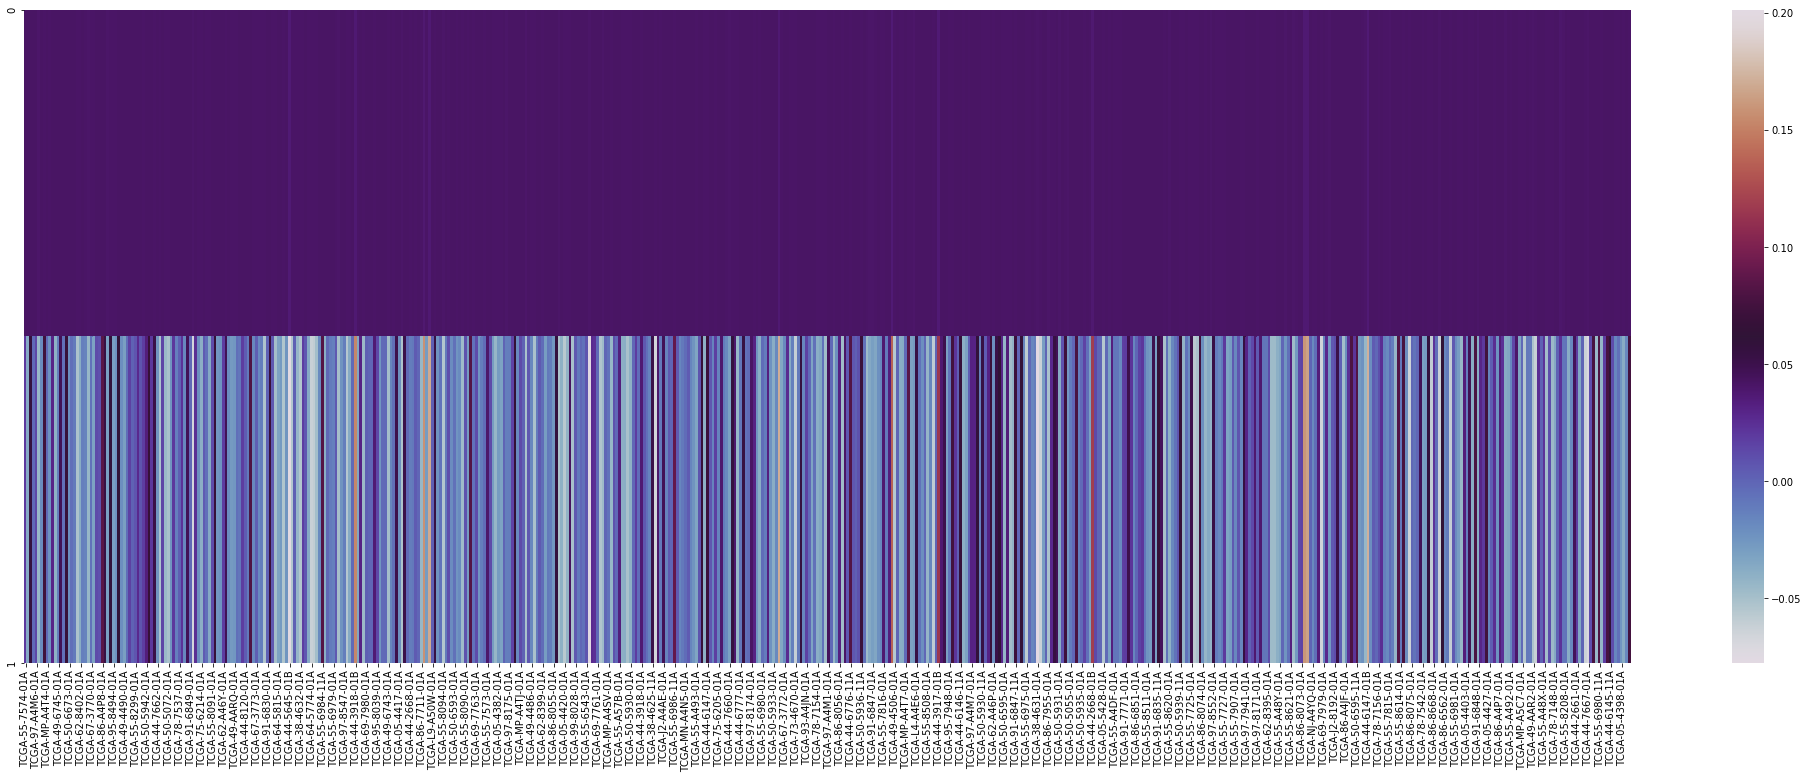

In [68]:
# df = df.iloc[:, 1:586]
map= pd.DataFrame(pca.components_,columns=df.columns)
plt.figure(figsize=(36,12))
sns.heatmap(map,cmap='twilight')

In [65]:
# gene expression RNA sequence data 
dataset2 = "data/TCGA-LUSC.tsv"
df2 = pd.read_csv(dataset2, sep='\t', header=0)
df2.mean()

TCGA-77-A5GA-01A    2.978247
TCGA-58-8387-01A    2.972683
TCGA-22-4599-01A    2.683341
TCGA-77-7142-11A    3.274978
TCGA-NC-A5HJ-01A    3.437213
                      ...   
TCGA-39-5039-01A    3.040690
TCGA-43-8118-01A    3.410629
TCGA-43-6647-01A    3.438066
TCGA-18-3406-01A    3.041821
TCGA-56-7730-11A    3.330116
Length: 550, dtype: float64

In [66]:
df2.fillna(df2.mean())

,Ensembl_ID,TCGA-77-A5GA-01A,TCGA-58-8387-01A,TCGA-22-4599-01A,TCGA-77-7142-11A,TCGA-NC-A5HJ-01A,TCGA-77-A5G6-01A,TCGA-O2-A52Q-01A,TCGA-90-7769-01A,TCGA-56-8504-01A,...,TCGA-51-4079-11A,TCGA-77-7465-01A,TCGA-63-A5MG-01A,TCGA-56-7579-01A,TCGA-77-8148-01A,TCGA-39-5039-01A,TCGA-43-8118-01A,TCGA-43-6647-01A,TCGA-18-3406-01A,TCGA-56-7730-11A
0,ENSG00000000003.13,11.301496,11.177420,9.917372,10.049849,10.369597,12.232421,11.852920,11.482304,11.159871,...,11.746934,12.353698,12.050529,11.803728,11.315150,11.404609,11.113742,11.066762,11.600378,11.057992
1,ENSG00000000005.5,0.000000,0.000000,0.000000,2.584963,1.000000,1.584963,3.321928,0.000000,0.000000,...,3.807355,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.584963,3.169925
2,ENSG00000000419.11,10.479780,10.659104,9.453271,10.501837,11.093418,10.832099,10.827343,11.749031,10.510764,...,11.448116,12.142745,10.564149,10.983706,10.749869,10.435670,11.354800,10.302639,11.500842,10.251482
3,ENSG00000000457.12,8.471675,8.945444,9.157347,9.787903,9.766529,9.778077,8.994353,8.957102,9.074141,...,10.678600,10.098032,9.537218,9.294621,9.592457,9.030667,9.103288,9.014020,9.280771,9.019591
4,ENSG00000000460.15,8.405141,9.118941,9.255029,7.321928,8.927778,9.828136,8.618386,9.197217,9.139551,...,8.375039,10.553629,8.339850,8.813781,9.741467,8.550747,9.011227,8.768184,8.820179,6.845490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60483,__no_feature,21.186970,21.149569,20.385185,21.645906,21.602103,21.641727,21.536214,21.467019,20.861803,...,23.539689,22.109681,21.992169,21.568401,21.636684,20.148115,21.940375,21.890954,21.226462,21.794908
60484,__ambiguous,20.404991,21.060933,20.003936,20.801011,20.829376,20.651274,21.217255,21.380152,20.317563,...,22.497802,21.320282,21.148982,20.886528,20.641660,20.665118,20.641464,21.338186,20.986605,21.029624
60485,__too_low_aQual,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60486,__not_aligned,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
df2['id1'] = df2.index
df2.set_index('Ensembl_ID',inplace=True)
df2 = df2.T
df2.head()

Ensembl_ID,ENSG00000000003.13,ENSG00000000005.5,ENSG00000000419.11,ENSG00000000457.12,ENSG00000000460.15,ENSG00000000938.11,ENSG00000000971.14,ENSG00000001036.12,ENSG00000001084.9,ENSG00000001167.13,...,ENSGR0000275287.3,ENSGR0000276543.3,ENSGR0000277120.3,ENSGR0000280767.1,ENSGR0000281849.1,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
TCGA-77-A5GA-01A,11.301496,0.000000,10.479780,8.471675,8.405141,7.918863,9.216746,10.855647,14.178898,9.784635,...,0.0,0.0,0.0,0.0,0.0,21.186970,20.404991,0.0,0.0,23.442353
TCGA-58-8387-01A,11.177420,0.000000,10.659104,8.945444,9.118941,9.368506,9.636625,10.590587,12.624795,10.948367,...,0.0,0.0,0.0,0.0,0.0,21.149569,21.060933,0.0,0.0,25.228361
TCGA-22-4599-01A,9.917372,0.000000,9.453271,9.157347,9.255029,8.965784,10.211888,10.087463,13.211280,9.501837,...,0.0,0.0,0.0,0.0,0.0,20.385185,20.003936,0.0,0.0,23.318429
TCGA-77-7142-11A,10.049849,2.584963,10.501837,9.787903,7.321928,11.870365,13.557703,11.593858,9.891784,10.633903,...,0.0,0.0,0.0,0.0,0.0,21.645906,20.801011,0.0,0.0,23.784045
TCGA-NC-A5HJ-01A,10.369597,1.000000,11.093418,9.766529,8.927778,11.690871,11.118292,11.385323,10.616549,10.364135,...,0.0,0.0,0.0,0.0,0.0,21.602103,20.829376,0.0,0.0,23.894515


In [68]:
# df2 = df.iloc[:, 1:586]
df2 = df2.iloc[1:586, :]

dataScaled2 = pd.DataFrame(preprocessing.scale(df2),columns = df2.columns) 
pca2 = PCA(n_components=2)
pca2.fit(dataScaled2)
dfPCA2 = pca2.transform(dataScaled2)

principalComp2 = pd.DataFrame(pca2.components_,columns=dataScaled2.columns,index = ['PC-1','PC-2'])
principalComp2 = principalComp2.T
print(principalComp2.nlargest(5, ['PC-1']))
print(principalComp2.nlargest(5, ['PC-2']))

                        PC-1      PC-2
Ensembl_ID                            
ENSG00000177479.18  0.004068  0.000111
ENSG00000198218.9   0.004068  0.000157
ENSG00000176095.10  0.004068  0.000050
ENSG00000164091.10  0.004068  0.000043
ENSG00000172046.17  0.004068  0.000078
                        PC-1      PC-2
Ensembl_ID                            
ENSG00000006377.10  0.003541  0.018525
ENSG00000011677.11  0.003977  0.007590
ENSG00000006606.7   0.003870  0.007121
ENSG00000001084.9  -0.000491  0.005245
ENSG00000043355.9   0.004042  0.003321


In [27]:
lungdf = pd.merge(df, df2, on=['Ensembl_ID'])

In [28]:
lungdf.shape

(60478, 1171)

In [30]:
lungdf = lungdf[:-5]
msk = np.random.rand(len(lungdf)) < 0.8
train = lungdf[msk]
test = lungdf[~msk]
lungdf.shape

(60468, 1171)

In [31]:
len(train)

48367

In [32]:
len(test)

12101

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# decTree = DecisionTreeClassifier()
# decTree.fit(X,y)